In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', palette='muted', font='serif')

In [2]:
from glob import glob

In [3]:
dfs = []
for fn in glob('learningsys-2018-gpu-mux/**/*.pq', recursive=True):
    df = pd.read_parquet(fn)
    _, _, approach, model, proc, i  = fn.split("/")
    df['approach'] = approach
    df['model'] = model
    df['n_procs'] = int(proc)
    df['proc'] = i.split('.')[0]
    dfs.append(df)
df = pd.concat(dfs)

In [7]:
df = df[df['approach'].isin(['mps', 'mps-even', 'mps-even-times-2', 'batch'])]

In [8]:
def plot_line(ax, model_name, estimator):
    sns.lineplot(
        x='n_procs', 
        y='duration_ms', 
        hue='approach',
        style='approach',
        markers=True,
        data=df[df['model'] == model_name], 
        estimator=estimator,
        ci=None,
        ax=ax
    )

In [9]:
def plot_model(model_name):
    fig, (ax_mean, ax_p99) = plt.subplots(1,2,sharey=True, figsize=(10,5))
    plot_line(ax_mean, model_name, lambda s: np.mean(s))
    plot_line(ax_p99, model_name, lambda s: np.percentile(s, 99))
    ax_mean.set_xlabel("Number of Replica")
    ax_p99.set_xlabel("Number of Replica")
    ax_mean.set_ylabel("Latency (ms)")
    ax_mean.set_title("Mean Latency")
    ax_p99.set_title("P99 Latency")
    fig.suptitle(model_name)
    fig.savefig(model_name+'.png')

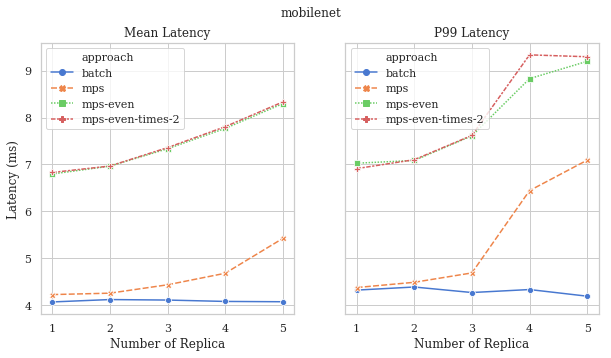

In [10]:
plot_model('mobilenet')

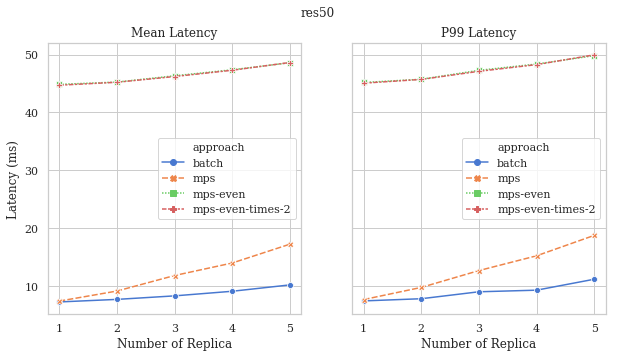

In [11]:
plot_model('res50')

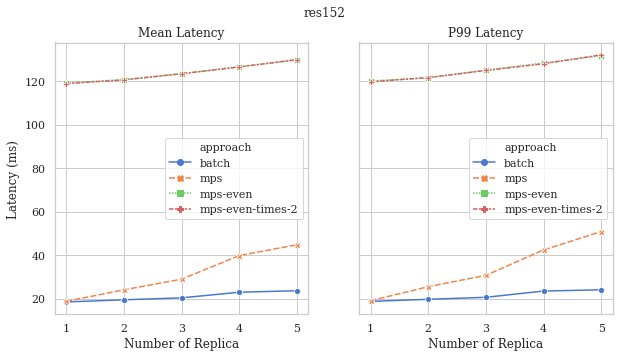

In [12]:
plot_model('res152')